![pancakespilesPythonlists.png](http://ungrid.unal.edu.co/gjhernandezp/algorithms/pancakes/pancakespilesPythonlistsonespatula.png)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pydot
from collections import defaultdict
from IPython.display import Image, display

In [3]:
def lstr(p):
        return ''.join([str(elem)  for elem in p])

# Presentacion de la Red de panckake
Las dos funciones modificadas hacen el plot de la red de panckakes y adicioanlmente busca la minima cantidd de flips necesarios para ordenar los panckakes

## Funciones

In [4]:
def ModifiedBFS(s): 
  # Create dictionaries graph, visited and pydot graph G
  graph = defaultdict()
  visited = defaultdict()
  G = pydot.Dot(graph_type="graph")
  flips = []

  # Create a queue for BFS
  queue_flips = []
  queue = []

  # Mark the source node as visited and enqueue it
  queue_flips.append(0)
  queue.append(s)
  visited[lstr(s)] = True

  while queue: 
    # Dequeue a vertex from queue 
    s = queue.pop(0)
    cFlips = queue_flips.pop(0)
    graph[lstr(s)] = []
    node = pydot.Node(lstr(s))
    G.add_node(node)
    
    # Get all adjacent vertices of the 
    # dequeued vertex s. If a adjacent 
    # has not been visited, then mark it 
    # visited and enqueue it
    if (s != sorted(s)):
      cFlips += 1
      for i in range(len(s)-1):
        d = s[i+1: : -1] + s[i+2:]
        if (d != s) and not (lstr(d) in visited.keys()):

          if (d != sorted(d)):
            node = pydot.Node(lstr(d))
          else:
            node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green

          G.add_node(node)
          edge = pydot.Edge(lstr(s),lstr(d))
          G.add_edge(edge)
          graph[lstr(s)].append(lstr(d))
          queue.append(d)
          queue_flips.append(cFlips) 
          visited[lstr(d)] = True 
          
        elif d != s:
          if not (G.get_edge(lstr(d), lstr(s)) or G.get_edge(lstr(s), lstr(d))):
            edge = pydot.Edge(lstr(s),lstr(d))
            graph[lstr(s)].append(lstr(d))
            queue.append(d)
            queue_flips.append(cFlips) 
            G.add_edge(edge)
            
        if (d == sorted(d)):
          flips.append(cFlips)

  # Dsplay the pydot graph G
  im = Image(G.create_png())
  display(im)
  return flips

In [5]:
def ModifiedBFSPreSols(s): 
  # Create dictionaries graph,visited and pydot graph G
  graph = defaultdict()
  visited = defaultdict()
  G = pydot.Dot(graph_type="graph")
  flips = []

  # Create a queue for BFS 
  queue = []
  queue_flips = [] 

  # Mark the source node as visited and enqueue it 
  queue.append(s) 
  queue_flips.append(0)
  visited[lstr(s)] = True

  while queue:
    # Dequeue a vertex from queue 
    s = queue.pop(0) 
    graph[lstr(s)]=[]
    cFlips = queue_flips.pop(0)

    flag = False
    for i in range(len(s)-1):
      d = s[i+1::-1] + s[i+2:]
      if (d == sorted(d)) :
            flag = True
    if flag:
      node = pydot.Node(lstr(s),style="filled", fillcolor="yellow")
    else: 
      node = pydot.Node(lstr(s))

    G.add_node(node)
    
    # Get all adjacent vertices of the 
    # dequeued vertex s. If a adjacent 
    # has not been visited, then mark it 
    # visited and enqueue it 
    if (s != sorted(s)):
      cFlips += 1
      for i in range(len(s)-1):
        d = s[i+1::-1] + s[i+2:]  
        if (d != s) and not(lstr(d) in visited.keys()):
          if (d != sorted(d)):
              node = pydot.Node(lstr(d))
          else:
            node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green
          
          G.add_node(node)
          edge = pydot.Edge(lstr(s),lstr(d))
          G.add_edge(edge)
          graph[lstr(s)].append(lstr(d))
          queue_flips.append(cFlips)
          queue.append(d) 
          visited[lstr(d)] = True
        elif d != s:
          if not (G.get_edge(lstr(d), lstr(s)) or G.get_edge(lstr(s), lstr(d))):
            edge = pydot.Edge(lstr(s),lstr(d))
            graph[lstr(s)].append(lstr(d))
            queue.append(d)
            queue_flips.append(cFlips) 
            G.add_edge(edge)

        if (d == sorted(d)):
          flips.append(cFlips)
        
  # Dsplay the pydot graph G
  im = Image(G.create_png())
  display(im)
  return flips

In [6]:
def ModifiedBFSPreSolsLevel(s,L):
  # Create dictionaries graph,visited and pydot graph G
  graph = defaultdict()
  visited = defaultdict()
  G = pydot.Dot(graph_type="graph")
  flips = []

  # Create a queue for BFS 
  queue = []
  queue_flips = []

  # Mark the source node as visited and enqueue it 
  queue.append([s,0])
  queue_flips.append(0) 
  visited[lstr(s)] = True

  while queue:
    # Dequeue a vertex from queue 
    e = queue.pop(0)
    s = e[0]
    l = e[1] 
    graph[lstr(s)] = []
    cFlips = queue_flips.pop(0)

    flag = False
    for i in range(len(s)-1):
      d = s[i+1::-1] + s[i+2:]
      if (d == sorted(d)):
        flag = True
        
    if flag:
      node = pydot.Node(lstr(s),style="filled", fillcolor="yellow")
    else: 
      node = pydot.Node(lstr(s))

    G.add_node(node)
    
    # Get all adjacent vertices of the 
    # dequeued vertex s. If a adjacent 
    # has not been visited, then mark it 
    # visited and enqueue it 
    if (s != sorted(s)) and (l < L):
      cFlips += 1
      for i in range(len(s)-1):
        d = s[i+1::-1] + s[i+2:]  
        if (d != s) and not (lstr(d) in visited.keys()):
          if (d != sorted(d)):
              node = pydot.Node(lstr(d))
          else:
            node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green
          
          G.add_node(node)
          edge = pydot.Edge(lstr(s), lstr(d))
          G.add_edge(edge)
          graph[lstr(s)].append(lstr(d))
          queue.append([d, l+1])
          queue_flips.append(cFlips) 
          visited[lstr(d)] = True
        elif d != s:
          if not (G.get_edge(lstr(d), lstr(s)) or G.get_edge(lstr(s), lstr(d))):
            edge = pydot.Edge(lstr(s),lstr(d))
            graph[lstr(s)].append(lstr(d))
            queue.append([d, l+1])
            queue_flips.append(cFlips) 
            G.add_edge(edge)
        if (d == sorted(d)):
          flips.append(cFlips)
        
  # Dsplay the pydot graph G
  im = Image(G.create_png())
  display(im)
  return flips

## Red panckakes *(Nodo en verde ordenado)*

Se presenta la red de Panckakes para una pila $p$ de tamaño de 4 y 3 panckakes, estas se introduciran del siguiente modo:

$p = [2, 3, 1]$

$p = [4, 2, 1, 3]$

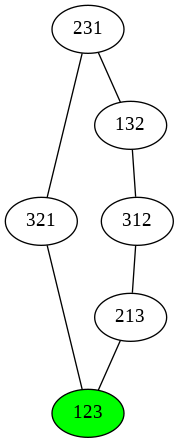

Flips: 2
Flips: 4


In [7]:
p = [2,3,1]
flips = ModifiedBFS(p)
flips = set(flips)
for flip in flips:
  print("Flips:",flip)

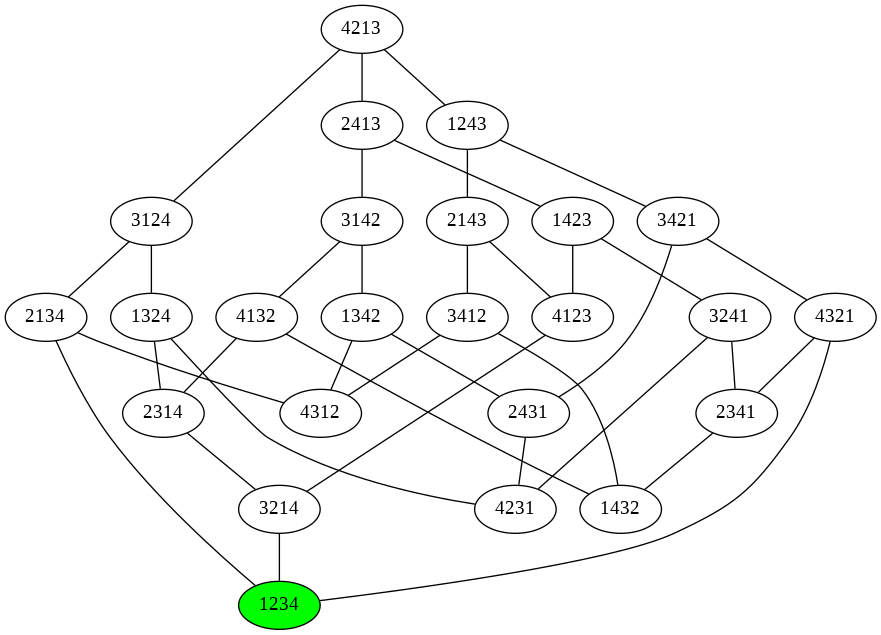

Flips: 3
Flips: 4
Flips: 5


In [8]:
p = [4, 2, 1, 3]
flips = ModifiedBFS(p)
flips = set(flips)
for flip in flips:
  print("Flips:",flip)

## Red panckakes *(Nodo amarillo previo al Nodo donde esta ordenado)*


Se presenta la red de Panckakes para una pila $p$ de tamaño de 4 y 3 panckakes, estas se introduciran del siguiente modo:

$p = [2, 3, 1]$

$p = [2, 1, 4, 3]$

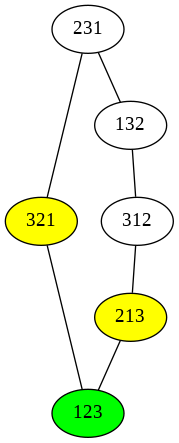

Flips: 2
Flips: 4


In [9]:
p = [2,3,1]
flips = set(ModifiedBFSPreSols(p))
for flip in flips:
  print("Flips:",flip)

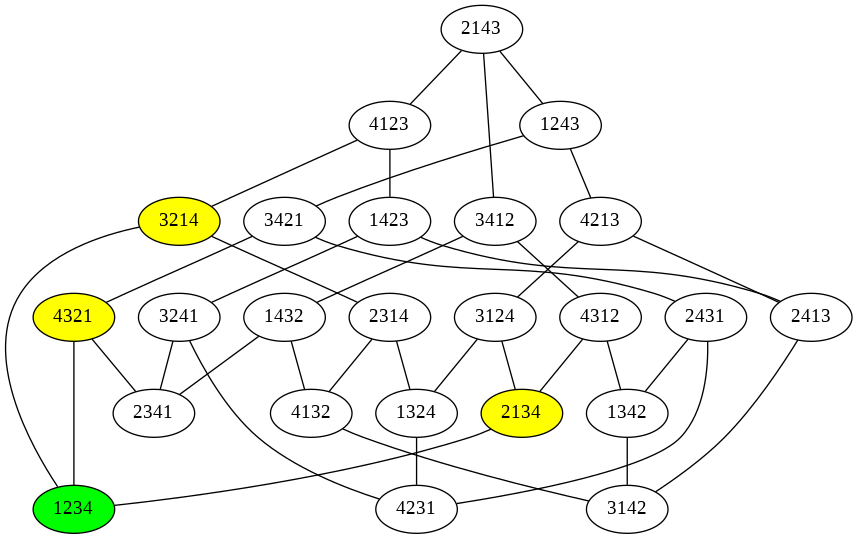

Flips: 3
Flips: 4
Flips: 5


In [10]:
p = [2,1,4,3]
flips = set(ModifiedBFSPreSols(p))
for flip in flips:
  print("Flips:",flip)

## Red panckakes *(Llega hasta un grado de profundidad)*
Se presenta la red de Panckakes para una pila $p$ de tamaño de 5 y 4 panckakes, estas se introduciran del siguiente modo:

$p = [5, 2, 3, 4, 1]$ hasta el nivel 4

$p = [2, 3, 4, 1]$ hasta el nivle 5

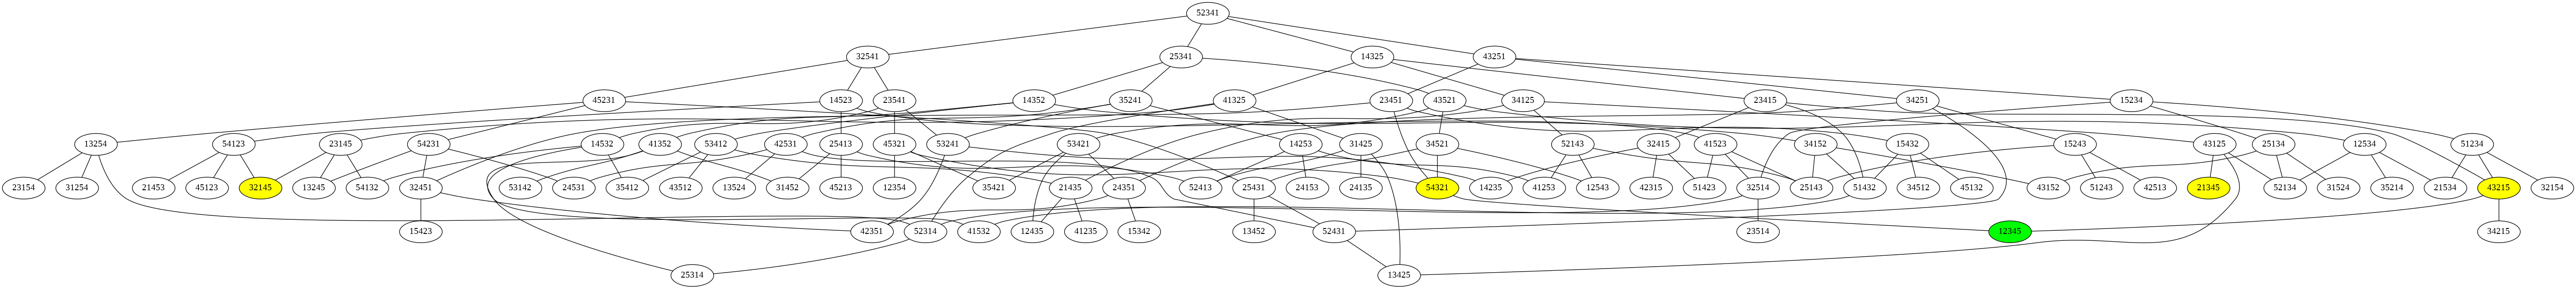

Flips: 4


In [11]:
p = [5, 2, 3, 4, 1]
levels = 4
flips = set(ModifiedBFSPreSolsLevel(p, levels))
for flip in flips:
  print("Flips:",flip)

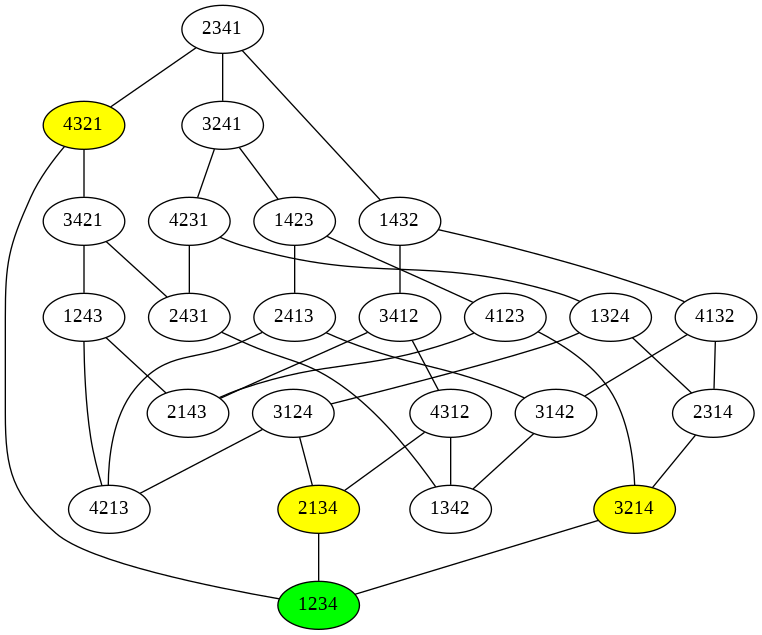

Flips: 2
Flips: 5


In [12]:
p = [2,3,4,1]
levels = 5
flips = set(ModifiedBFSPreSolsLevel(p,levels))
for flip in flips:
  print("Flips:",flip)

# $Pn$ para $n$ grandes


In [4]:
def BFSPanckakes(s, filePath): 
  # Create dictionaries graph, visited and pydot graph G
  graph = defaultdict()
  visited = defaultdict()
  lastFlip = 0

  # Create a queue for BFS
  queue_flips = []
  queue = []

  # Mark the source node as visited and enqueue it
  queue_flips.append(0)
  queue.append(s)
  graph[lstr(s)] = []
  visited[lstr(s)] = True

  archivo = open(filePath, 'w')
  archivo.write('Number of Panckakes: {}\n'.format(len(s)))
  try:
    while queue: 
      # Dequeue a vertex from queue 
      s = queue.pop(0)
      cFlips = queue_flips.pop(0)
      
      # Get all adjacent vertices of the 
      # dequeued vertex s. If a adjacent 
      # has not been visited, then mark it 
      # visited and enqueue it
      if (s != sorted(s)):
        cFlips += 1
        for i in range(len(s) - 1):
          d = s[i+1: : -1] + s[i+2:]
          if (d != s) and not (lstr(d) in visited.keys()):
            graph[lstr(d)] = []
            graph[lstr(s)].append(lstr(d))
            queue.append(d)
            queue_flips.append(cFlips) 
            visited[lstr(d)] = True 
          elif d != s:
            if not (lstr(s) in graph[lstr(d)] or lstr(d) in graph[lstr(s)]):
              graph[lstr(s)].append(lstr(d))
              graph[lstr(d)].append(lstr(s))
              queue.append(d)
              queue_flips.append(cFlips) 

          if (d == sorted(d) and lastFlip != cFlips):
            lastFlip = cFlips
            line = "Flips needed: {}\n".format(cFlips)
            archivo.write(line)
  except:
    print('Time Out')
  finally:
    archivo.close()

In [14]:
filePath = '/content/drive/MyDrive/Colab Notebooks/panckakes.txt'
p = [4, 2, 1, 3, 8, 7, 5, 6]
BFSPanckakes(p, filePath)

In [15]:
filePath = '/content/drive/MyDrive/Colab Notebooks/panckakes_1.txt'
p = [4, 2, 9, 1, 3, 8, 7, 5, 6]
BFSPanckakes(p, filePath)

In [ ]:
filePath = '/content/drive/MyDrive/Colab Notebooks/panckakes_2.txt'
p = [4, 2, 9, 1, 3, 8, 0, 7, 5, 6]
BFSPanckakes(p, filePath)

In [ ]:
p = [11, 4, 2, 9, 1, 3, 8, 10, 7, 5, 6]
BFSPanckakes(p, filePath)

# References

- Breadth First Search or BFS for a Graph https://www.geeksforgeeks.org/breadth-first-search-or-bfs-for-a-graph/

- Graph visualization using Python https://www.youtube.com/watch?v=SpDI6-FvtJY

- nikhilkumarsingh
/
PyDot-Examples https://github.com/nikhilkumarsingh/PyDot-Examples/blob/master/Directory_Structure_Plotter.ipynb

- pydot https://pypi.org/project/pydot/

- Graphviz https://www.graphviz.org/

- NetworkX https://networkx.github.io/


